# Principal Component Analysis

## Wednesday April 27 2016


In [58]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

In [59]:
# Load in the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

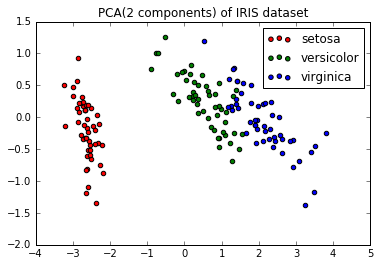

In [60]:
#############################
### PCA with 2 components  ##
#############################


pca = decomposition.PCA(n_components=2)
X_r = pca.fit_transform(X)

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')


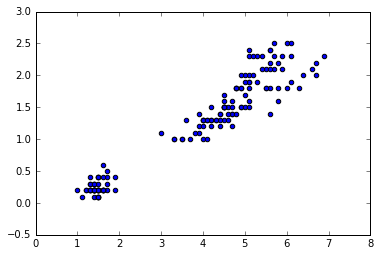

In [61]:

X_transformedSK = pca.transform(X)
# only 2 columns!!

X_reconstituted = pca.inverse_transform(X_transformedSK)
# Turn it back into its 4 column using only 2 principal components

plt.scatter(X[:,2], X[:,3])

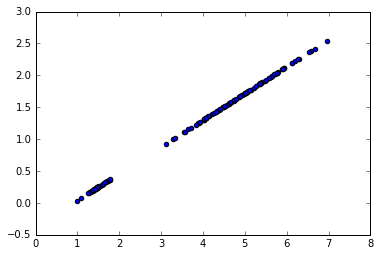

In [62]:
plt.scatter(X_reconstituted[:,2], X_reconstituted[:,3])

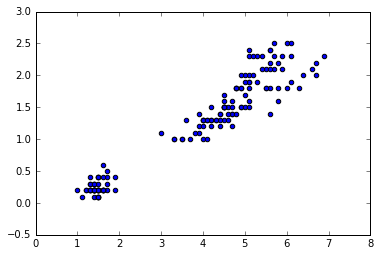

In [64]:
#############################
### PCA with 3 components  ##
#############################
plt.cla()
# EXERCISE: change the line below to run the analysis
pca = decomposition.PCA(n_components=3)
X_r = pca.fit_transform(X)
X_3 = pca.transform(X)

X_3

X_reconstituted = pca.inverse_transform(X_3)

# Graph the reconstituted Data set
plt.scatter(X[:,2], X[:,3])


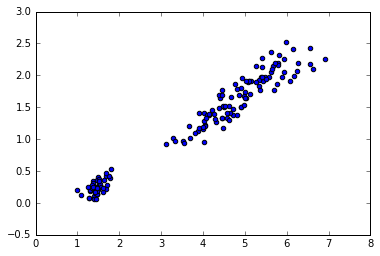

In [65]:
# EXERCISE
# Graph the new projection on reconstituated data
plt.scatter(X_reconstituted[:,2], X_reconstituted[:,3])


explained variance ratio (first two components): [ 0.92461621  0.05301557  0.01718514]


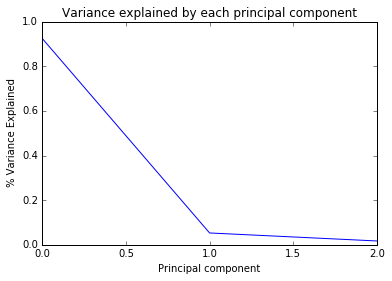

In [66]:
#############################
### choosing components  ####
#############################



pca = decomposition.PCA(n_components=3)
X_r = pca.fit_transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.cla()
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')


In [68]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647],
       [ 0.58099728, -0.59641809, -0.07252408, -0.54906091]])

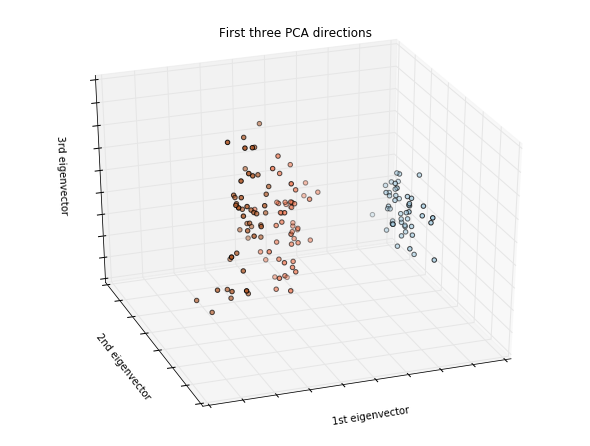

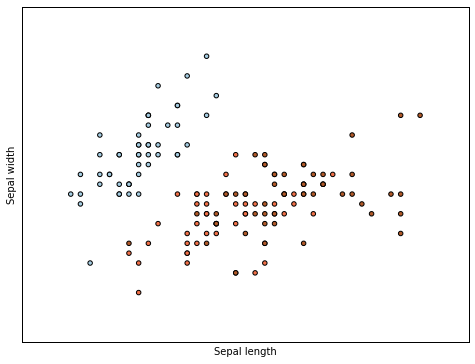

In [67]:
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()